In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load the model
model = tf.keras.models.load_model('./models/trained_object_detection.h5')


2022-07-17 19:35:42.544158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-17 19:35:42.544245: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
image = load_img('./images/N207.jpeg')
image = np.array(image, dtype=np.uint8)
image1 = load_img('./images/N207.jpeg', target_size=(224, 224))
image_arr = img_to_array(image1)/255.0 # convert into array and normalize the output


In [5]:
# size of array
h, w, d = image.shape
print('Height', h)
print("Width", w)

Height 423
Width 541


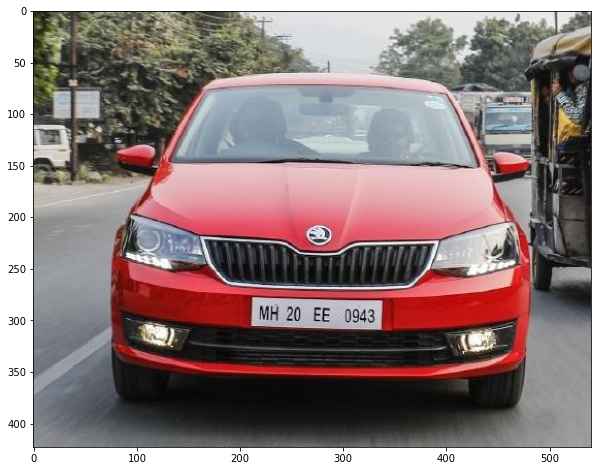

In [6]:
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [7]:
test_arr = image_arr.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [8]:
# predictions
coords = model.predict(test_arr)
coords

2022-07-17 19:35:46.890110: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-17 19:35:48.052237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


array([[0.38069582, 0.64062417, 0.6428695 , 0.7191659 ]], dtype=float32)

In [9]:
# denormalize the values
denorm = np.array([w, w, h, h])
coords = coords * denorm
coords

array([[205.95643854, 346.57767355, 271.93378687, 304.20718467]])

In [10]:
coords = coords.astype(np.int32)
coords

array([[205, 346, 271, 304]], dtype=int32)

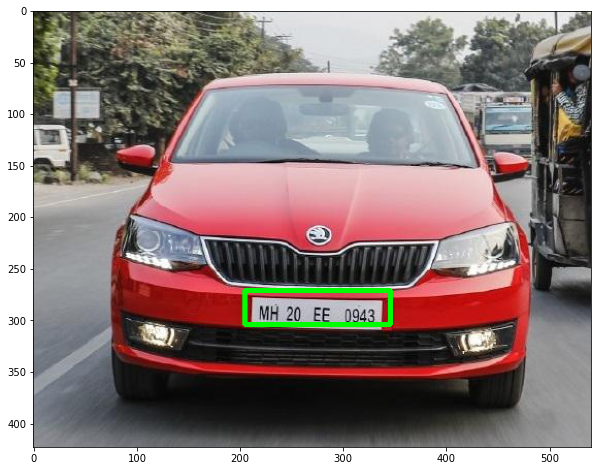

In [11]:
# draw bounding rectangle
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
cv2.rectangle(image, pt1, pt2, (0, 255, 2), 3)
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [12]:
# %load 
# load the model
path = 'images/N205.jpeg'
def object_detection(path):
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    image_arr = img_to_array(image1)/255.0 # convert into array and normalize the output
    # size of array
    h, w, d = image.shape
    test_arr = image_arr.reshape(1, 224, 224, 3)
    # predictions
    coords = model.predict(test_arr)
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding rectangle
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, (0, 255, 2), 3)
    return image, coords



1/1 [==============================] - 0s 113ms/step
(147, 181) (262, 207)


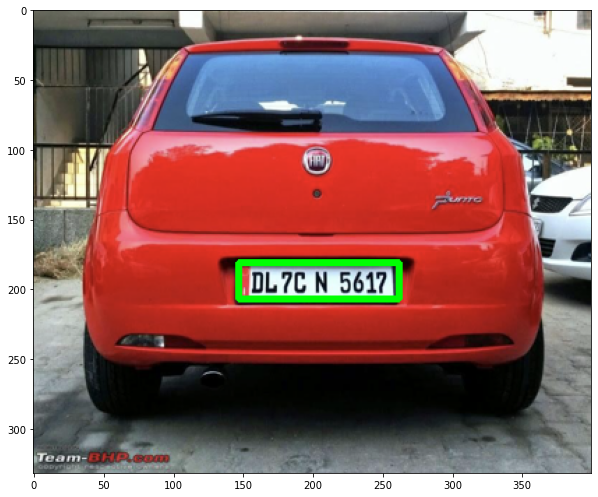

In [13]:
path = './images/Cars34.png'

image, cods = object_detection(path)
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [19]:
import os
for r,s,f in os.walk("/"):
    for i in f:
        if "tesseract" in i:
            print(os.path.join(r,i))


/System/Volumes/Data/Users/szokirov/Library/Caches/Homebrew/tesseract_bottle_manifest--5.2.0
/System/Volumes/Data/Users/szokirov/Library/Caches/Homebrew/tesseract--5.2.0
/System/Volumes/Data/Users/szokirov/Library/Caches/Homebrew/downloads/38361bb888a10d5d00f00cb667ebbdc3d53d13e90b5ed254d124e485aaf78ba7--tesseract--5.2.0.arm64_monterey.bottle.tar.gz
/System/Volumes/Data/Users/szokirov/Library/Caches/Homebrew/downloads/a9ee8dce90d84a7e33b9d4009599b8f6c3d4022d308317a1518079e17b636a09--tesseract-5.2.0.bottle_manifest.json
/System/Volumes/Data/Users/szokirov/Library/Caches/pip/wheels/6c/c5/81/8310cc52076953e53412ed1875a5e224c92940235bdcee21a2/tesseract-0.1.3-py3-none-any.whl
/System/Volumes/Data/Users/szokirov/miniforge3/bin/pytesseract
/System/Volumes/Data/Users/szokirov/miniforge3/lib/python3.9/site-packages/pytesseract/pytesseract.py
/System/Volumes/Data/Users/szokirov/miniforge3/lib/python3.9/site-packages/pytesseract/__pycache__/pytesseract.cpython-39.pyc
/System/Volumes/Data/Users/sz

### OCR

In [20]:
import pytesseract as pt
pt.pytesseract.tesseract_cmd =r'/opt/homebrew/bin/tesseract'

1/1 [==============================] - 0s 52ms/step
(147, 181) (262, 207)


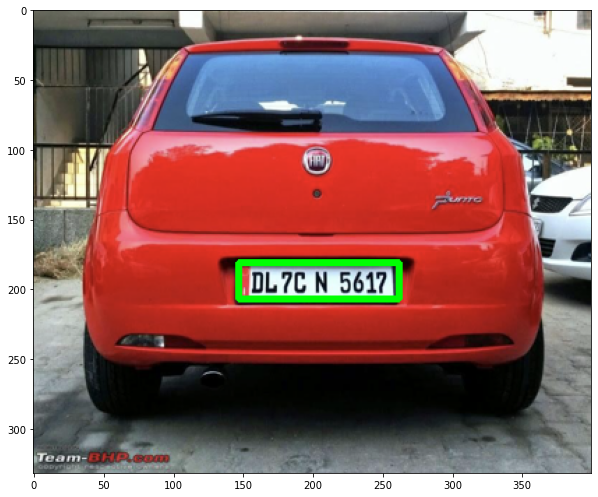

In [15]:
path = './images/Cars34.png'

image, cods = object_detection(path)
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

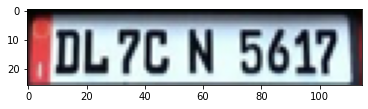

In [16]:
xmin, xmax, ymin, ymax = cods[0]
img = np.array(load_img(path))
roi = img[ymin:ymax, xmin:xmax]
plt.imshow(roi)
plt.show()

In [22]:
# read the text
text = pt.image_to_string(roi)
print(text)

DL7C N 5617 |

